In [1]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], 'C:/Users/tijmen.vanetten/Documents/emobility-vanetten/src'))  

In [2]:
from datasets import ShellDataset, PaloAltoDataset, BoulderDataset, WeatherEcadDataset

# Palo ALto

In [9]:
df = PaloAltoDataset(subset=None, series_length=365)
dataset = df.load_dataset()

Loaded 155 time series each with length 365


DatetimeIndex(['2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22',
               ...
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-29',
               '2019-10-30', '2019-10-31'],
              dtype='datetime64[ns]', name='date', length=292, freq='D')

In [4]:
df = ShellDataset(subset=None, series_length=365)
dataset = df.load_dataset()

Loaded 157 time series each with length 365


In [5]:
df = BoulderDataset()
dataset = df.load_dataset()

Loaded 105 time series each with length 365


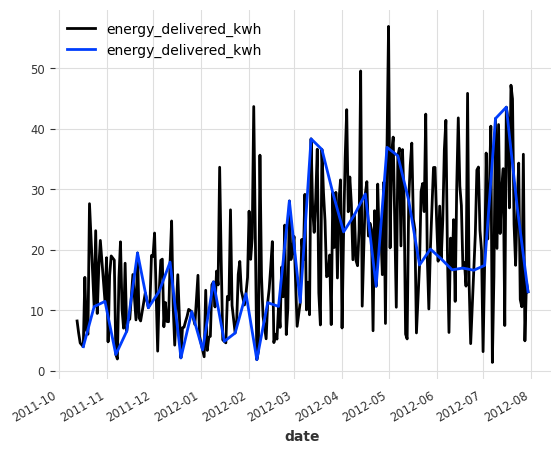

In [25]:
dataset['train'][0].plot()
dataset['train'][0].resample(freq='W-MON').plot()

In [29]:
timeseries = dataset['train'][0]
from darts import TimeSeries
def resample_weekly_sum(time_series):
    # Convert the Darts TimeSeries to a pandas DataFrame
    df = time_series.pd_dataframe()

    # Resample the DataFrame to weekly frequency and apply sum aggregation
    resampled_df = df.resample('W').sum()

    # Convert the resampled DataFrame back to a Darts TimeSeries
    resampled_time_series = TimeSeries.from_dataframe(resampled_df, freq='W')

    return resampled_time_series

resampled_weekly_sum = resample_weekly_sum(timeseries)

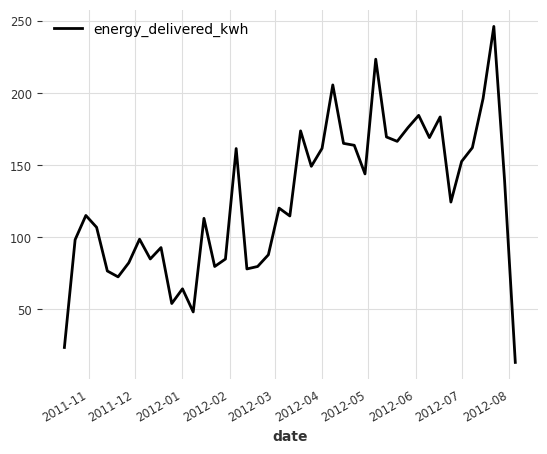

In [30]:
resampled_weekly_sum.plot()